In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fatal-police-shootings-data.csv')

In [3]:
df_population = pd.read_html('https://it.wikipedia.org/wiki/Stati_federati_degli_Stati_Uniti_d%27America_per_popolazione')[0]

In [4]:
df_population = df_population.drop(columns=['Seggi nella Camera', 'Grandi elettori', 'Pop. per grandi elettori', 'Pop. per seggio nella Camera'], axis=1)

In [5]:
df_population.head(10)

,Posizione,Stato,Popolazione (1-4-2020),% sulla popolazione totale
0,1,California,39 538 223,"11,80%"
1,2,Texas,29 145 505,"8,70%"
2,3,Florida,21 538 187,"6,43%"
3,4,New York,20 201 249,"6,03%"
4,5,Pennsylvania,13 002 700,"3,88%"
5,6,Illinois,12 812 508,"3,82%"
6,7,Ohio,11 799 448,"3,52%"
7,8,Georgia,10 711 908,"3,20%"
8,9,Carolina del Nord,10 439 388,"3,12%"
9,10,Michigan,10 077 331,"3,01%"


In [6]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7699,8371,Andrew Ainsworth,2022-08-29,shot,gun,60.0,M,NaN,Albemarle County,VA,False,attack,Not fleeing,False,-78.525,38.026,True
7700,8368,William Isaac Rich,2022-08-30,shot,unknown weapon,22.0,M,NaN,Cedar Rapids,IA,False,other,Not fleeing,False,-91.678,41.924,True
7701,8369,Donovan Lewis,2022-08-30,shot,unarmed,20.0,M,B,Columbus,OH,False,undetermined,Not fleeing,True,-83.087,39.943,True
7702,8376,Jacob M. Jamrozy,2022-08-31,shot,gun,39.0,M,NaN,Omaha,NE,False,other,Not fleeing,True,-96.070,41.203,True


In [7]:
df.shape

(7704, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7704 entries, 0 to 7703
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7704 non-null   int64  
 1   name                     7295 non-null   object 
 2   date                     7704 non-null   object 
 3   manner_of_death          7704 non-null   object 
 4   armed                    7495 non-null   object 
 5   age                      7229 non-null   float64
 6   gender                   7684 non-null   object 
 7   race                     6253 non-null   object 
 8   city                     7704 non-null   object 
 9   state                    7704 non-null   object 
 10  signs_of_mental_illness  7704 non-null   bool   
 11  threat_level             7704 non-null   object 
 12  flee                     6833 non-null   object 
 13  body_camera              7704 non-null   bool   
 14  longitude               

In [9]:
df.isnull().sum()

id                            0
name                        409
date                          0
manner_of_death               0
armed                       209
age                         475
gender                       20
race                       1451
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        871
body_camera                   0
longitude                   835
latitude                    835
is_geocoding_exact            0
dtype: int64

### Ci sono tanti omicidi da parte della polizia negli USA. Cerchiamo, analizzando i dati, di capire cosa succede rispondendo alle "5 W" (when, where, who, why, what(how))

### Userò tutte le colonne tranne le ultime tre

In [10]:
df = df.drop(columns=['longitude', 'latitude', 'is_geocoding_exact'], axis=1)

In [11]:
df['date'] =  pd.to_datetime(df['date'])

In [12]:
df['year'] = df['date'].dt.year

In [13]:
total_cases = 7704

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7704 entries, 0 to 7703
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       7704 non-null   int64         
 1   name                     7295 non-null   object        
 2   date                     7704 non-null   datetime64[ns]
 3   manner_of_death          7704 non-null   object        
 4   armed                    7495 non-null   object        
 5   age                      7229 non-null   float64       
 6   gender                   7684 non-null   object        
 7   race                     6253 non-null   object        
 8   city                     7704 non-null   object        
 9   state                    7704 non-null   object        
 10  signs_of_mental_illness  7704 non-null   bool          
 11  threat_level             7704 non-null   object        
 12  flee                     6833 non-

In [15]:
df['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', nan, 'shovel',
       'vehicle', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'undetermined', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'BB gun', 'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'railroad spikes',
       'stapler', 'beer bottle', 'unknown weapon', 'binoculars',
       'pellet gun', 'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'pair of scissors', 'pole', 'pick-axe', 'flashlight', 'baton',
       'spear', 'chair', 'pitchfork', 'hatchet and gun', 'rock',
       'piece of wood', 'pipe', 'glass shard', 'motorcycle',
       'pepper spray', 'metal rake

In [16]:
df['armed'] = df.armed.fillna('undetermined')
# come si legge nel file readme, quando non si sa se la vittima fosse armata o meno,
# usiamo undetermined

In [17]:
mean_age = df['age'].mean()
mean_age = round(mean_age)
mean_age

37

In [18]:
df['age'] = df.age.fillna(mean_age)

In [19]:
df.gender.value_counts()

M    7336
F     348
Name: gender, dtype: int64

In [20]:
df['gender'] = df.gender.fillna('unknown')

In [21]:
df['race'] = df.race.fillna('unknown')

In [22]:
df.race.value_counts()

W          3189
B          1681
unknown    1451
H          1127
A           112
N            97
O            47
Name: race, dtype: int64

In [23]:
df['race'] = df.race.replace({'W': 'White', 'B': 'Black', 'A': 'Asian', 
                              'N': 'Native', 'H': 'Hispanic', 'O': 'Other'})

In [24]:
df['flee'] = df.flee.fillna('unknown')

In [25]:
df.isnull().sum()

id                           0
name                       409
date                         0
manner_of_death              0
armed                        0
age                          0
gender                       0
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                         0
body_camera                  0
year                         0
dtype: int64

In [26]:
df.corr()

,id,age,signs_of_mental_illness,body_camera,year
id,1.000000,0.022602,-0.114457,0.089557,0.988471
age,0.022602,1.000000,0.095124,-0.050337,0.021951
signs_of_mental_illness,-0.114457,0.095124,1.000000,0.046780,-0.110949
body_camera,0.089557,-0.050337,0.046780,1.000000,0.090264
year,0.988471,0.021951,-0.110949,0.090264,1.000000


In [27]:
df.describe()

,id,age,year
count,7704.000000,7704.000000,7704.000000
mean,4254.819185,37.161085,2018.407840
std,2405.766317,12.554558,2.230475
min,3.000000,2.000000,2015.000000
25%,2160.750000,28.000000,2016.000000
50%,4280.000000,36.000000,2018.000000
75%,6339.250000,45.000000,2020.000000
max,8381.000000,92.000000,2022.000000


### iniziamo a esplorare i dati, vediamo dove e quando

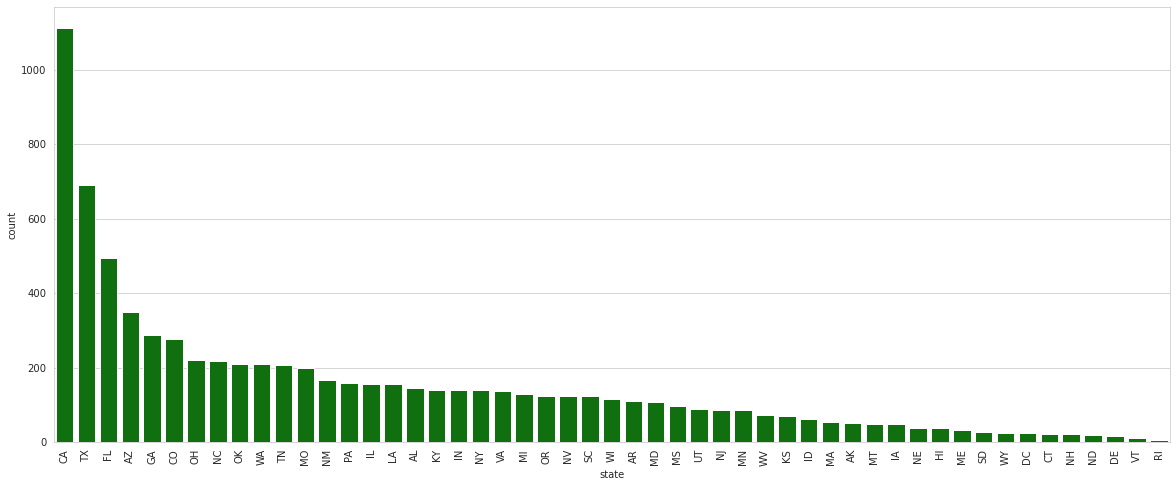

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='state', order = df['state'].value_counts().index, color='green')
plt.xticks(rotation=90);

In [29]:
df.state.value_counts().head(3).sum()

2299

In [30]:
2299 * 100 / total_cases

29.841640706126686

#### vediamo che California, Texas e Florida insieme fanno il 30% dei casi, ma fanno anche il 27% della popolazione dell'intero paese(fonte wikipedia), quindi un dato abbastanza in media

In [31]:
df.state.value_counts()['AZ']

350

In [32]:
350 * 100 / total_cases

4.543094496365525

In [33]:
df_population.loc[df_population['Stato'] == 'Arizona']

,Posizione,Stato,Popolazione (1-4-2020),% sulla popolazione totale
13,14,Arizona,7 151 502,"2,13%"


#### Molto male per esempio l'Arizona che fa il 4.5% dei casi ma ha solo il 2.13% della popolazione

In [34]:
df.state.value_counts()['CA']

1113

In [35]:
1113 * 100 / total_cases

14.447040498442368

In [36]:
df_population.loc[df_population['Stato'] == 'California']

,Posizione,Stato,Popolazione (1-4-2020),% sulla popolazione totale
0,1,California,39 538 223,"11,80%"


#### La California alza la media con il 14.44% dei casi sull'11.8% della popolazione

In [37]:
df.year.value_counts()

2021    1054
2020    1020
2019     999
2015     994
2018     993
2017     981
2016     958
2022     705
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

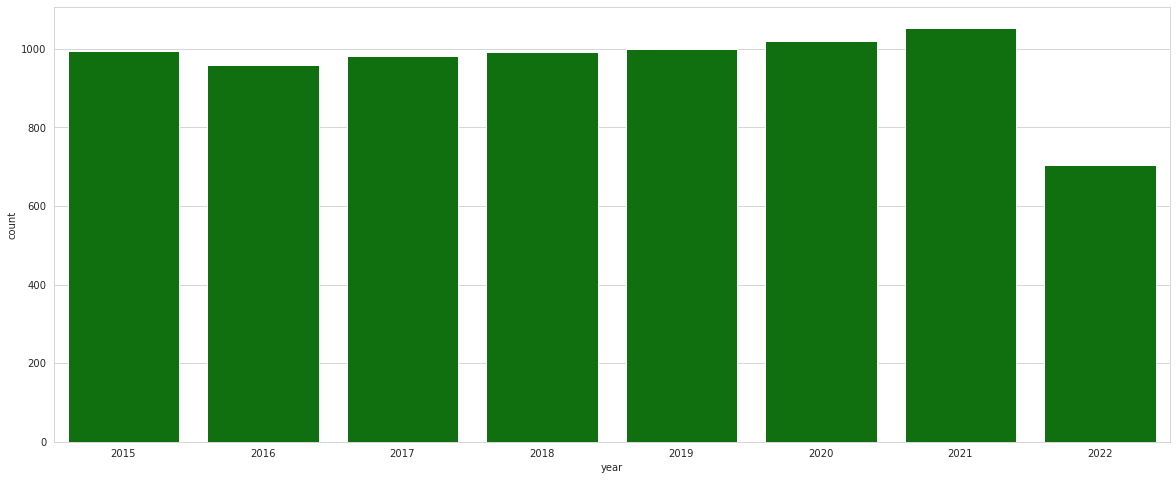

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='year', color='green')

#### dal 2015 al 2021 non ci sono outliers, però vediamo come nel 2020 e 2021 abbiamo superato i mille casi. Sembra esserci un progressivo aumento della violenza

### cerchiamo adesso di capire forse la cosa piu importante, chi sono le vittime

<AxesSubplot:xlabel='gender', ylabel='count'>

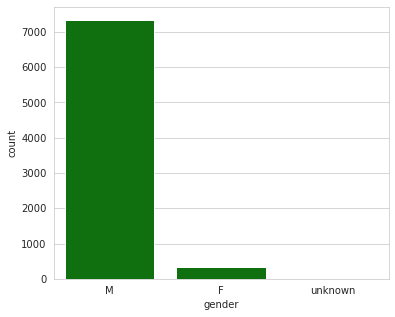

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='gender', color='green')

#### nessun dubbio sul genere

<AxesSubplot:xlabel='race', ylabel='count'>

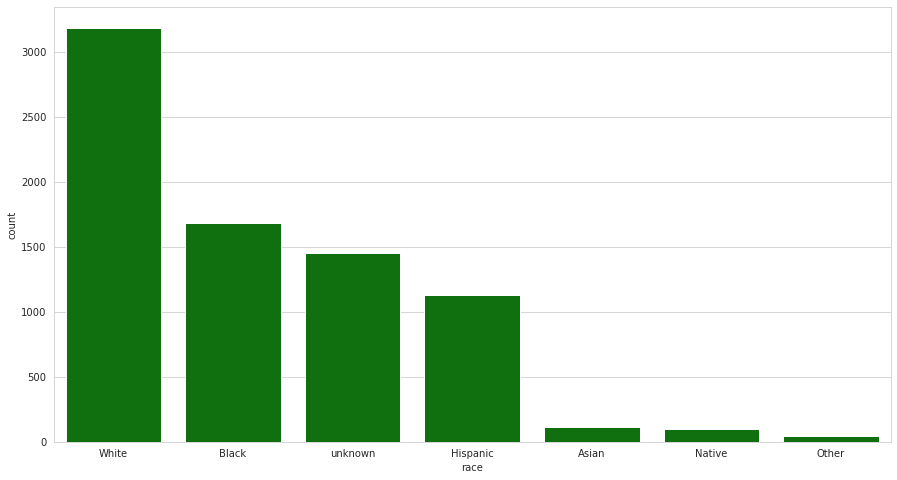

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='race', color='green', order = df['race'].value_counts().index)

In [41]:
df.race.value_counts()

White       3189
Black       1681
unknown     1451
Hispanic    1127
Asian        112
Native        97
Other         47
Name: race, dtype: int64

In [42]:
3189 * 100 / total_cases

41.39408099688473

In [43]:
1681 * 100 / total_cases

21.819833852544132

In [44]:
1127 * 100 / total_cases

14.62876427829699

In [45]:
112 * 100 / total_cases

1.453790238836968

#### I bianchi sono il 60% della popolazione e rappresentano il 41% dei casi.
#### I neri sono il 13.6% della popolazione e rappresentano il 21% dei casi.
#### Meglio gli asiatici (6% della popolazione) con l'1.45% dei casi.
#### I latini sono invece il 18% della popolazione con il 14% dei casi.
#### fonte: https://www.census.gov/quickfacts/fact/table/US/PST045221

### Cerchiamo di capire come avvengono gli omicidi

<AxesSubplot:xlabel='manner_of_death', ylabel='count'>

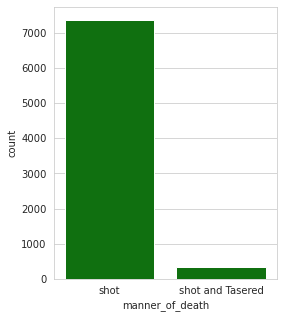

In [46]:
sns.set_style("whitegrid")
plt.figure(figsize=(4, 5))
sns.countplot(data=df, x='manner_of_death', color='green', order = df['manner_of_death'].value_counts().index)

<AxesSubplot:xlabel='signs_of_mental_illness', ylabel='count'>

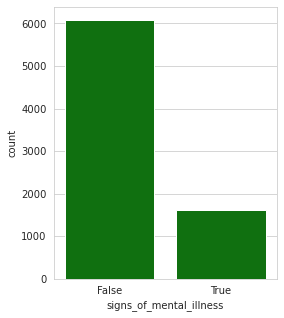

In [47]:
sns.set_style("whitegrid")
plt.figure(figsize=(4, 5))
sns.countplot(data=df, x='signs_of_mental_illness', color='green', order = df['signs_of_mental_illness'].value_counts().index)

In [48]:
df.threat_level.value_counts()

attack          4864
other           2540
undetermined     300
Name: threat_level, dtype: int64

#### dato interessante questo sul livello di minaccia

<AxesSubplot:xlabel='threat_level', ylabel='count'>

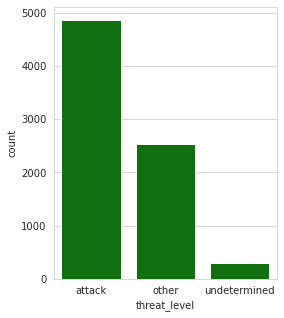

In [49]:
sns.set_style("whitegrid")
plt.figure(figsize=(4, 5))
sns.countplot(data=df, x='threat_level', color='green', order = df['threat_level'].value_counts().index)

<AxesSubplot:xlabel='flee', ylabel='count'>

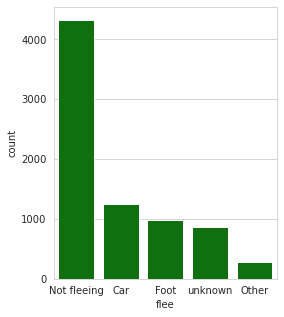

In [50]:
sns.set_style("whitegrid")
plt.figure(figsize=(4, 5))
sns.countplot(data=df, x='flee', color='green', order = df['flee'].value_counts().index)

In [51]:
mask_child = df['age'] < 12

In [52]:
df[mask_child]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
833,980,Jeremy Mardis,2015-11-03,shot,unarmed,6.0,M,White,Marksville,LA,False,other,Car,True,2015
2899,3229,Kameron Prescott,2017-12-21,shot,unarmed,6.0,M,White,Schertz,TX,False,other,Not fleeing,False,2017
6644,7322,Fanta Bility,2021-08-27,shot,unarmed,8.0,F,unknown,Sharon Hill,PA,False,other,Not fleeing,False,2021
7240,7981,Clesslynn Jane Crawford,2022-03-26,shot,unarmed,2.0,F,unknown,Baxter Springs,KS,False,other,unknown,False,2022


#### senza parole

### Cerchiamo di capire il perchè. C'è una differenza nel modo di fare della polizia in base alla razza?

<AxesSubplot:xlabel='threat_level', ylabel='count'>

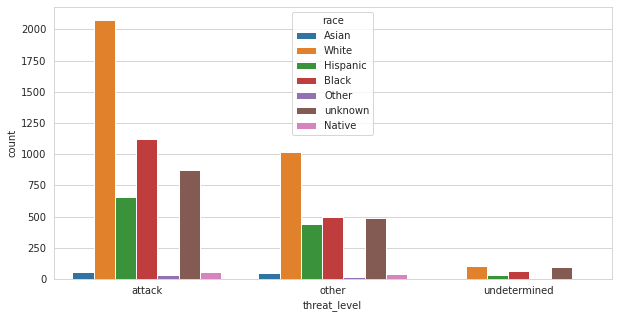

In [53]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='threat_level', hue='race', order = df['threat_level'].value_counts().index)

In [54]:
mask_unarmed = df['armed'] == 'unarmed'

In [55]:
df_unarmed = df[mask_unarmed]

In [56]:
df_unarmed

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,2015
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,White,Burlington,IA,False,other,Not fleeing,True,2015
17,36,Artago Damon Howard,2015-01-08,shot,unarmed,36.0,M,Black,Strong,AR,False,attack,Not fleeing,False,2015
62,352,Joshua Omar Garcia,2015-01-26,shot,unarmed,24.0,M,Hispanic,Tahoka,TX,False,other,Car,False,2015
72,342,Ralph Willis,2015-01-29,shot,unarmed,42.0,M,White,Stillwater,OK,False,other,Foot,False,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7506,8166,NaN,2022-06-21,shot,unarmed,37.0,M,unknown,Adelanto,CA,False,other,Foot,False,2022
7524,8185,Jayland Walker,2022-06-27,shot,unarmed,25.0,M,Black,Akron,OH,False,other,Other,True,2022
7557,8215,Shane Netterville,2022-07-08,shot,unarmed,28.0,M,Native,Fargo,ND,False,other,Foot,False,2022
7618,8287,Kyle Dail,2022-07-27,shot,unarmed,30.0,M,unknown,Dallas,TX,False,undetermined,Car,True,2022


<AxesSubplot:xlabel='race', ylabel='count'>

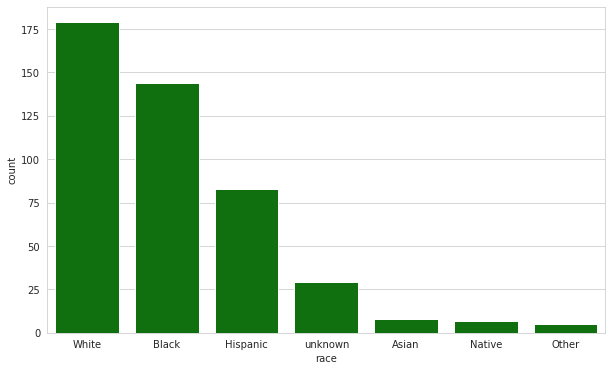

In [57]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df_unarmed, x='race', color='green', order = df_unarmed['race'].value_counts().index)

In [58]:
mask_armed = df['armed'] != 'unarmed'

In [59]:
df_armed = df[mask_armed]

<AxesSubplot:xlabel='race', ylabel='count'>

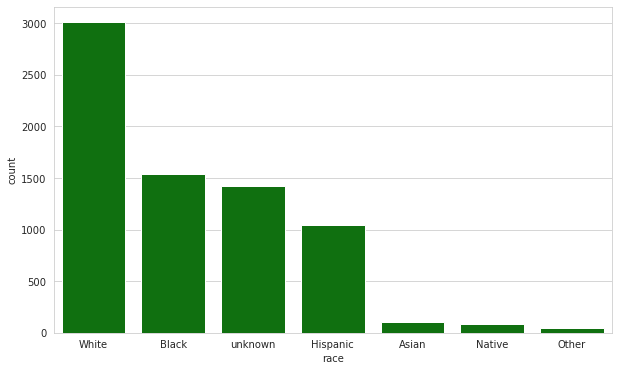

In [60]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df_armed, x='race', color='green', order = df_armed['race'].value_counts().index)

#### guardando questi ultimi due grafici, rimane innegabile che ci sia un bias

In [61]:
#### vediamo se c'e qualche stato dove il bias e piu presente

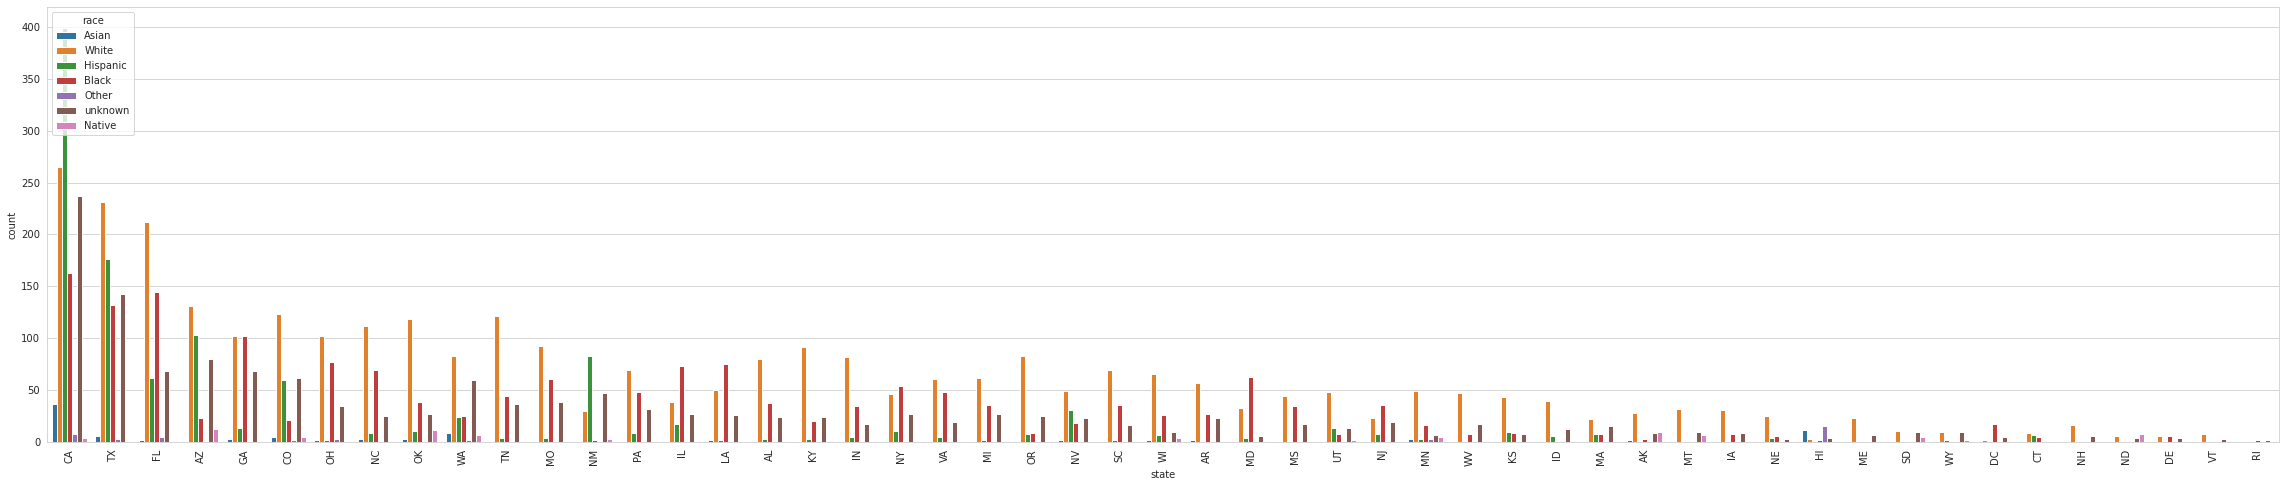

In [62]:
sns.set_style("whitegrid")
plt.figure(figsize=(40, 8))
sns.countplot(data=df, x='state', order = df['state'].value_counts().index, hue='race')
plt.xticks(rotation=90);

#### prediamo per esempio la Louisiana

In [63]:
df_population.loc[df_population['Stato'] == 'Louisiana']

,Posizione,Stato,Popolazione (1-4-2020),% sulla popolazione totale
24,25,Louisiana,4 657 757,"1,39%"


In [64]:
df.state.value_counts()['LA']

155

In [65]:
155 * 100 / total_cases

2.0119418483904465

#### 1.39% della popolazione e 2% dei casi

In [66]:
louisiana_mask = df['state'] == 'LA'

In [67]:
louisiana_df = df[louisiana_mask]

In [68]:
louisiana_df.shape

(155, 15)

<AxesSubplot:xlabel='race', ylabel='count'>

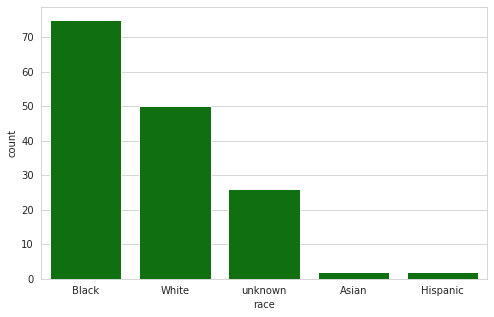

In [69]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=louisiana_df, x='race', color='green', order = louisiana_df['race'].value_counts().index)

#### I neri in Louisiana son il 12.4% della popolazione, fonte: https://www.census.gov/library/stories/state-by-state/louisiana-population-change-between-census-decade.html

In [70]:
df_louis_unarmed = df[louisiana_mask & mask_unarmed]

<AxesSubplot:xlabel='race', ylabel='count'>

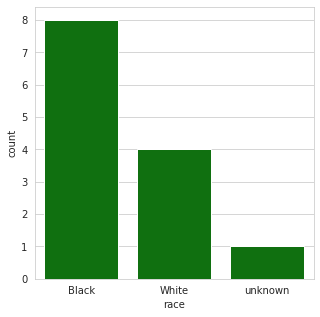

In [71]:
sns.set_style("whitegrid")
plt.figure(figsize=(5, 5))
sns.countplot(data=df_louis_unarmed, x='race', color='green', order = df_louis_unarmed['race'].value_counts().index)

#### Anche qui si ripete il bias, i neri hanno più possibilità di essere uccisi anche se disarmati

#### Ho cercato di rispondere a molte domande, dove avvengono gli omicidi, quando, qual è il sesso delle vittime, la loro razza, in che maniera vengono uccisi, e il perché, le varie situazioni. Infine ho cercato di dare una risposta alla fatidica domanda "la polizia è razzista?" Anche se quest'ultima meriterebbe un altro tipo di analisi sulla società americana.